# Thống kê cơ bản với Python

## Bài 1: Tính toán các giá trị trung bình

### BS. Lê Ngọc Khả Nhi


# Giới thiệu

Như ta biết, giá trị trung bình là một trị số thống kê mô tả, cho phép hình dung về khuynh hướng vị trí trung tâm của phân bố giá trị một biến số trong mẫu khảo sát.

Bài thực hành này nhằm giới thiệu một số giải pháp dưới dạng code snipet để tính toán 4 loại giá trị trung bình trong Python. 

Dữ liệu đầu vào của thống kê mô tả trong Python thường có cấu trúc iterable (có thể truy nhập tuần tự), thí dụ Python list, numpy 1D array, pandas Series. 

Với mỗi loại trị số trung bình, Nhi gợi ý nhiều cách viết code khác nhau, từ code thủ công/native Python cho đến dùng các modules thống kê như numpy, pandas, scipy.stats hay statistics:

In [118]:
import math
import statistics as stats
import numpy as np
import scipy.stats as scp_stat
import pandas as pd
import seaborn as sns

Trước hết, ta tạo 1 numpy array x có phân bố Gamma, trung bình = 3 và cỡ mẫu = 30; ngoài ra ta có 1 array khác là x_na chứa cùng nội dung như x nhưng có 4 vị trí missing value.

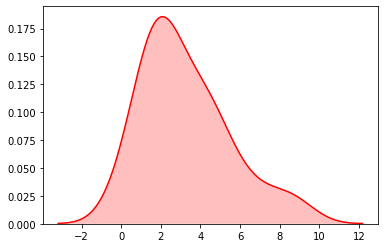

In [55]:
np.random.seed(123)
x = np.random.gamma(3, size = 30)

x_na = np.random.gamma(3, size = 30)
x_na[[0,5,10,20]] = np.nan

sns.kdeplot(x, shade = True, color = "r")

# Trung bình số học (Arithmetic mean)

Còn gọi là giá trị bình quân, giá trị kì vọng, là cách phổ biến nhất để ước tính trung bình của mẫu; được định nghĩa bằng công thức sau:

$$A={\frac {1}{n}}\sum _{i=1}^{n}x_{i}$$

Đầu tiên, ta tính thủ công bằng 1 hàm Python

In [41]:
# Cách 1

def a_mean(x = None):
    a = sum(x)/len(x)
    print(f'Giá trị trung bình: {a}')

In [42]:
a_mean(x)

Giá trị trung bình: 3.255313462897944


Không áp dụng được cho data có missing value

In [56]:
a_mean(x_na)

Giá trị trung bình: nan


Cách 2: Sử dụng hàm mean() của module statistics, cách này cũng không dùng được khi có missing value

In [44]:
# Cách 2:
stats.mean(x)

3.2553134628979445

In [57]:
stats.mean(x_na)

nan

Cách 3: dùng method mean của numpy, cũng không dùng được khi có missing value

In [58]:
# Cách 3
np.mean(x)

3.255313462897944

In [59]:
np.mean(x_na)

nan

Tuy nhiên numpy có hàm nanmean() cho phép tính trung bình cho array có missing value

In [61]:
# Cách 4
np.nanmean(x_na)

3.2188043468361647

Cách 5: Sử dụng method mean của 1 pandas series, áp dụng được cho cả data có hoặc không có NA

In [62]:
# Cách 5

xs = pd.Series(x)

xs.mean()

3.255313462897944

In [63]:
xs_na = pd.Series(x_na)

xs_na.mean()

3.218804346836164

Cách 6: Kết hợp hàm reduce và lambda (vô danh) của Python:

In [133]:
# Cách 6: Hàm reduce 

from functools import reduce

reduce(lambda j,k : j + k, x)/len(x)

3.255313462897944

# Trung bình trọng số (Weighted mean)

Trung bình có hiệu chỉnh trọng số được định nghĩa bằng công thức sau:

$$WA = \frac{\sum_{i=1}^{n}w_{i}x_{i}}{\sum_{i=1}^{n}w_{i}}$$

Thí dụ ta định nghĩa vector trọng số w như xi/tổng của x

In [155]:
w = x/sum(x)

w

array([0.01287827, 0.04760823, 0.01872852, 0.06527463, 0.00350947,
       0.0207434 , 0.01745436, 0.02575255, 0.02053431, 0.02066777,
       0.04777091, 0.03428575, 0.01445632, 0.05206377, 0.04545565,
       0.00970596, 0.02325064, 0.00215198, 0.04593546, 0.02450406,
       0.01508119, 0.03232828, 0.02127711, 0.03806826, 0.0900245 ,
       0.03480851, 0.04715888, 0.08443205, 0.06807225, 0.01601698])

Cách 1: Viết code Python thủ công

In [74]:
# Cách 1:

wa = (w * x).sum() / w.sum()

print(wa)

4.671065469379273


Cách 2: Cũng là code thủ công:

In [75]:
# Cách 2:

wa = sum(w[i] * x[i] for i in range(len(x))) / sum(w)

print(wa)

4.671065469379274


In [72]:
def w_mean(x = None, w = None):
    
    # wa = sum(w[i] * x[i] for i in range(len(x))) / sum(w)
    wa = (w * x).sum() / w.sum()
    
    print(f'Trung bình trọng số: {wa}')

In [73]:
w_mean(x,w)

Trung bình trọng số: 4.671065469379273


Cách 3: Sử dụng method average của numpy

In [71]:
# Cách 3: Sử dụng method average của numpy

np.average(x, weights=w)

4.671065469379273

Cách 4: Sử dụng hàm reduce

In [154]:
# Cách 4: Hàm reduce 

from functools import reduce

reduce(lambda j,k: np.prod(j) + np.prod(k), zip(x,w))

4.671065469379274

# Trung bình điều hòa (harmonic mean)

$$Hm = \frac{n}{\sum_{i=1}^{n}\frac{1}{x_{i}}}$$

Cách 1: Code thủ công

In [76]:
# Cách 1:

hm = len(x) / sum(1 / item for item in x)
print(hm)

1.5853519792451607


In [79]:
def h_mean(x = None):
    
    hm = len(x) / sum(1 / item for item in x)
    
    print(f'Trung bình điều hòa: {hm}')

In [80]:
h_mean(x)

Trung bình điều hòa: 1.5853519792451607


Cách 2: Dùng hàm harmonic_mean() của module statistics

In [81]:
# Cách 2:
stats.harmonic_mean(x)

1.5853519792451607

Lưu ý: Nếu dữ liệu có bất cứ giá trị nào = 0, harmonic mean sẽ = 0

In [85]:
x0 = np.append(x,0)

h_mean(x0)

Trung bình điều hòa: 0.0


C:\Users\bacsi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [86]:
stats.harmonic_mean(x0)

C:\Users\bacsi\Anaconda3\lib\statistics.py:355: RuntimeWarning: divide by zero encountered in double_scalars
  T, total, count = _sum(1/x for x in _fail_neg(data, errmsg))


0.0

Theo định nghĩa, harmonic mean không chấp nhận giá trị âm (hàm h_mean của ta tính được nhưng không có ý nghĩa), mọi module khác sẽ báo lỗi

In [89]:
x_neg = np.append(x, -1)

h_mean(x_neg)

Trung bình điều hòa: 1.7295977525641866


In [90]:
stats.harmonic_mean(x_neg)

StatisticsError: harmonic mean does not support negative values

In [92]:
scp_stat.hmean(x)

1.5853519792451607

In [93]:
scp_stat.hmean(x0)

ValueError: Harmonic mean only defined if all elements greater than zero

In [94]:
scp_stat.hmean(x_neg)

ValueError: Harmonic mean only defined if all elements greater than zero

harmonic mean không áp dụng được cho dữ liệu có NA

In [87]:
h_mean(x_na)

Trung bình điều hòa: nan


In [88]:
stats.harmonic_mean(x_na)

nan

In [95]:
scp_stat.hmean(x_na)

C:\Users\bacsi\Anaconda3\lib\site-packages\scipy\stats\stats.py:386: RuntimeWarning: invalid value encountered in greater
  if np.all(a > 0):


ValueError: Harmonic mean only defined if all elements greater than zero

Một phương pháp thú vị khác là dùng hàm đệ quy như sau:

In [96]:
# Cách 3: Hàm đệ quy (Recursion)

def HM(x = None):
    if len(x) == 1: return x[0]
    return len(x) / ( 1/x[0] + (len(x)-1)/HM(x[1:]))

HM(x)

1.5853519792451607

Cách 4: Dùng hàm reduce

In [132]:
# Cách 4: Hàm reduce 

from functools import reduce

reduce(lambda j,k : 1/j + 1/k, x)

1.5847324113175252

# Trung bình nhân (Geometric mean)

$$Gm = \sqrt[n]{\prod_{i}^{n}x_{i}}$$

Cách 1: Code thủ công với vòng lặp:

In [99]:
# Cách 1

def G_mean(x = None):
    gm = 1
    for _ in x:
        gm *=_
    gm **= 1/len(x)
    
    print(f'Trung bình nhân: {gm}')

In [104]:
G_mean(x)

Trung bình nhân: 2.4974963480018704


Cách 2: Sử dụng hàm reduce

In [114]:
# Cách 2
from functools import reduce

reduce(lambda j, k: j*k, x)**(1.0/len(x))

2.4974963480018704

Cách 3: Lại code thủ công với hỗ trợ của module math

In [158]:
# Cách 3

math.exp(math.fsum(math.log(_) for _ in x) / len(x))

2.4974963480018704

Cách 4: dùng method product của pandas series, chỉ dùng cho pandas series

In [116]:
# Cách 4: dùng cho pandas series

xs.product()**(1/len(xs))

2.4974963480018704

Cách 5: Dùng method prod của numpy array

In [122]:
# Cách 5: cho numpy array

def G_mean(x = None):
    return x.prod()**(1/len(x))

G_mean(x)

2.4974963480018704

Cách 6: Dùng hàm logarit của numpy

In [123]:
# Cách 6: 

def G_mean(x = None):
    
    _ = np.log(x)
    return np.exp(_.sum()/len(_))

G_mean(x)

2.49749634800187

Cách 7: dùng hàm gmean() của scipy:

In [120]:
import scipy as sc

sc.stats.gmean(x)

2.49749634800187

In [112]:
# Cách 7
scp_stat.mstats.gmean(x)

2.49749634800187

Tương tự Harmonic mean, ta cũng có thể dùng hàm đệ quy để tính Geometric mean:

In [108]:
# Cách 8: Hàm đệ quy (Recursion)

def GM(x = None):
    if len(x) == 1: return x[0]
    return (x[0] * GM(x[1:])**(len(x)-1))**(1/len(x))

In [109]:
print(f'Trung bình nhân: {GM(x)}')

Trung bình nhân: 2.4974963480018695


In [ ]:
Bài thực hành đến đây là hết, hẹn gặp lại lầ